In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import scipy

In [2]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [3]:
log_dirs = [
    '/home/gasanoe/HOME_SCRATCH_FOLDER/unlearning/logs/model_resnet18_lr_0.01_untrain07-18-09:37:27_SCRUB',
    '/home/gasanoe/HOME_SCRATCH_FOLDER/unlearning/logs/model_resnet18_lr_0.01_untrain07-18-09:46:32_neggradplus',
    '/home/gasanoe/HOME_SCRATCH_FOLDER/unlearning/logs/model_resnet18_lr_0.01_untrain07-18-09:48:16_finetuning',
    '/home/gasanoe/HOME_SCRATCH_FOLDER/unlearning/logs/model_resnet18_lr_0.01_untrain07-18-09:52:39_eu_5',
    '/home/gasanoe/HOME_SCRATCH_FOLDER/unlearning/logs/model_resnet18_lr_0.01_untrain07-18-10:38:54',
    '/home/gasanoe/HOME_SCRATCH_FOLDER/unlearning/logs/model_resnet18_lr_0.01_untrain07-23-14:57:32',
    '/home/gasanoe/HOME_SCRATCH_FOLDER/unlearning/logs/model_resnet18_lr_0.1_07-23-09:24:12'
    ]

methods = ['SCRUB', 'NegGrad+', 'Finetuning', 'EU-k', 'OUR METHOD-penalty', 'OUR METHOD-lagrange', 'Retrain']

In [4]:
markers = ['*', 'd', 'o', '>', '.', '<', 'D']

# Downloading the dataset

In [5]:
import data

In [6]:
dataset_handler = data.CIFAR100Handler(batch_size=128,
                                       validation_split=0.1,
                                       random_seed=42,
                                       data_dir='/home/gasanoe/HOME_SCRATCH_FOLDER/unlearning/data/cifar100')
data_confuser = data.uniform_confuser(confuse_level=.0, random_seed=42)
splitter = data.mix_both_sets(
    amend_split=1.,
    retain_split=0.1,
    random_seed=42
    )
confused_dataset_handler = data.AmendedDatasetHandler(
    dataset_handler,
    data_confuser,
    splitter,
    class_wise_corr=True
    )
train_loader, val_loader, test_loader, forget_loader, retain_loader, unseen_loader = confused_dataset_handler.get_dataloaders()

Files already downloaded and verified
Files already downloaded and verified


# Accuracy @ 5 on the retained set plots

In [23]:
all_values = []
for log_dir in log_dirs[:-1]:
    log_dir = log_dir + '/Accuracy_train_top5_retain'
    print(log_dir)
    # Initialize the event accumulator
    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()

    # Print all available tags (e.g., scalars, histograms, images, etc.)
    print(event_acc.Tags())

    # Get scalar data for a specific tag
    scalar_tag = 'Accuracy/train_top5'  # Change to the tag you are interested in
    scalar_events = event_acc.Scalars(scalar_tag)

    # Extract steps and values
    epochs = [event.step for event in scalar_events]
    values = [event.value for event in scalar_events]

    all_values.append(values)

/home/gasanoe/HOME_SCRATCH_FOLDER/unlearning/logs/model_resnet18_lr_0.01_untrain07-18-09:37:27_SCRUB/Accuracy_train_top5_retain
{'images': [], 'audio': [], 'histograms': [], 'scalars': ['Accuracy/train_top5'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}
/home/gasanoe/HOME_SCRATCH_FOLDER/unlearning/logs/model_resnet18_lr_0.01_untrain07-18-09:46:32_neggradplus/Accuracy_train_top5_retain
{'images': [], 'audio': [], 'histograms': [], 'scalars': ['Accuracy/train_top5'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}
/home/gasanoe/HOME_SCRATCH_FOLDER/unlearning/logs/model_resnet18_lr_0.01_untrain07-18-09:48:16_finetuning/Accuracy_train_top5_retain
{'images': [], 'audio': [], 'histograms': [], 'scalars': ['Accuracy/train_top5'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}
/home/gasanoe/HOME_SCRATCH_FOLDER/unlearning/logs/model_resnet18_lr_0.01_untrain

In [24]:
# Retrain from scratch metrics

event_acc = EventAccumulator(log_dirs[-1])
event_acc.Reload()

print(event_acc.Tags())

scalar_tag = 'Accuracy/train_top5'  # Change to the tag you are interested in
scalar_events = event_acc.Scalars(scalar_tag)

epochs = [event.step for event in scalar_events]
values = [event.value for event in scalar_events]

all_values.append(values)

{'images': [], 'audio': [], 'histograms': [], 'scalars': ['Loss/train', 'Accuracy/train_top1', 'Accuracy/train_top5', 'Loss/val', 'Accuracy/val_top1', 'Accuracy/val_top5'], 'distributions': [], 'tensors': [], 'graph': True, 'meta_graph': False, 'run_metadata': ['step1']}


In [25]:
len(all_values)

7

In [26]:
len(methods)

7

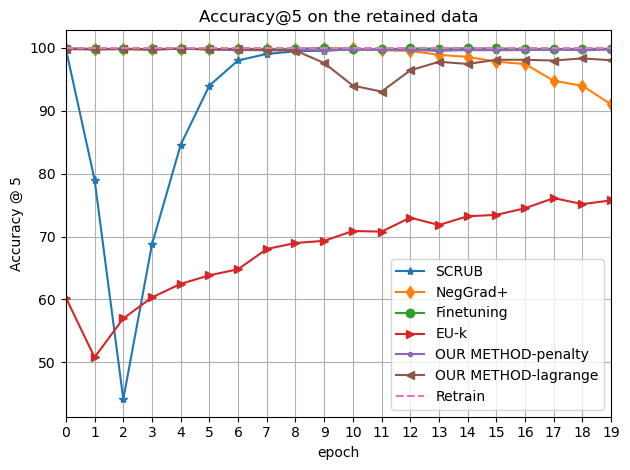

In [27]:
for value, method, marker in zip(all_values[:-1], methods[:-1], markers[:-1]):
    plt.plot(np.arange(20), value, label=method, marker=marker)

plt.plot(np.arange(20), 20 * [all_values[-1][-1]], linestyle='--', label=methods[-1])
plt.xlabel('epoch')
plt.ylabel('Accuracy @ 5')
plt.grid()
# plt.ylim(bottom=20, top=100)
plt.xlim(left=0, right=19)
plt.xticks(np.arange(0, 20, 1))
plt.title('Accuracy@5 on the retained data')
plt.legend()
plt.tight_layout()
plt.savefig('/home/gasanoe/HOME_SCRATCH_FOLDER/unlearning/plots/acc_5_retain.pdf')

# Accuracy @ 5 on the forget set

In [28]:
all_values = []
for log_dir in log_dirs[:-1]:
    log_dir = log_dir + '/Accuracy_train_top5_forget'
    print(log_dir)
    # Initialize the event accumulator
    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()

    # Print all available tags (e.g., scalars, histograms, images, etc.)
    print(event_acc.Tags())

    # Get scalar data for a specific tag
    scalar_tag = 'Accuracy/train_top5'  # Change to the tag you are interested in
    scalar_events = event_acc.Scalars(scalar_tag)

    # Extract steps and values
    epochs = [event.step for event in scalar_events]
    values = [event.value for event in scalar_events]

    all_values.append(values)

/home/gasanoe/HOME_SCRATCH_FOLDER/unlearning/logs/model_resnet18_lr_0.01_untrain07-18-09:37:27_SCRUB/Accuracy_train_top5_forget
{'images': [], 'audio': [], 'histograms': [], 'scalars': ['Accuracy/train_top5'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}
/home/gasanoe/HOME_SCRATCH_FOLDER/unlearning/logs/model_resnet18_lr_0.01_untrain07-18-09:46:32_neggradplus/Accuracy_train_top5_forget
{'images': [], 'audio': [], 'histograms': [], 'scalars': ['Accuracy/train_top5'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}
/home/gasanoe/HOME_SCRATCH_FOLDER/unlearning/logs/model_resnet18_lr_0.01_untrain07-18-09:48:16_finetuning/Accuracy_train_top5_forget
{'images': [], 'audio': [], 'histograms': [], 'scalars': ['Accuracy/train_top5'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}
/home/gasanoe/HOME_SCRATCH_FOLDER/unlearning/logs/model_resnet18_lr_0.01_untrain

In [29]:
from models import get_model
from metrics import calculate_accuracy
import torch

In [30]:
model = get_model('resnet18', num_classes=100, pretrained_weights=None,
                  weight_path=log_dirs[-1]+'_model.pth')
device = torch.device('cuda')
model.to(device)
print('Model is loaded')

Loaded weights from /home/gasanoe/HOME_SCRATCH_FOLDER/unlearning/logs/model_resnet18_lr_0.1_07-23-09:24:12_model.pth
Model 'resnet18' loaded successfully!
Number of layers: 62
Total parameters: 11227812
Trainable parameters: 11227812
Model is loaded


In [31]:
n_batches = 0
full_acc = []
for inputs, targets in forget_loader:
    inputs, targets = inputs.to(device), targets.to(device)

    outputs = model(inputs)
    acc = calculate_accuracy(outputs, targets, topk=(5,))
    full_acc += acc
    n_batches += 1
all_values.append([sum(full_acc) / len(full_acc)])

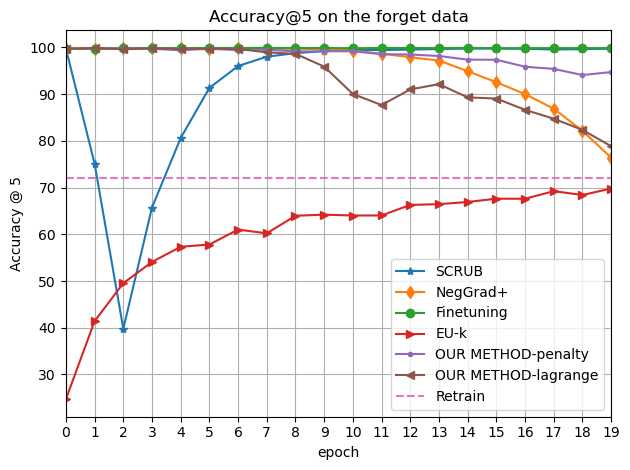

In [32]:
for value, method, marker in zip(all_values[:-1], methods[:-1], markers[:-1]):
    plt.plot(np.arange(20), value, label=method, marker=marker)

plt.plot(np.arange(20), 20 * [all_values[-1][-1].cpu().item()], linestyle='--', label=methods[-1])
plt.xlabel('epoch')
plt.ylabel('Accuracy @ 5')
plt.grid()
# plt.ylim(bottom=20, top=100)
plt.xlim(left=0, right=19)
plt.xticks(np.arange(0, 20, 1))
plt.title('Accuracy@5 on the forget data')
plt.legend()
plt.tight_layout()
plt.savefig('/home/gasanoe/HOME_SCRATCH_FOLDER/unlearning/plots/acc_5_forget.pdf')

# Accuracy @5 on the validation set

In [33]:
all_values = []
for log_dir in log_dirs:
    print(log_dir)
    # Initialize the event accumulator
    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()

    # Print all available tags (e.g., scalars, histograms, images, etc.)
    print(event_acc.Tags())

    # Get scalar data for a specific tag
    scalar_tag = 'Accuracy/val_top5'  # Change to the tag you are interested in
    scalar_events = event_acc.Scalars(scalar_tag)

    # Extract steps and values
    epochs = [event.step for event in scalar_events]
    values = [event.value for event in scalar_events]

    all_values.append(values)

/home/gasanoe/HOME_SCRATCH_FOLDER/unlearning/logs/model_resnet18_lr_0.01_untrain07-18-09:37:27_SCRUB
{'images': [], 'audio': [], 'histograms': [], 'scalars': ['Loss/val', 'Accuracy/val_top1', 'Accuracy/val_top5'], 'distributions': [], 'tensors': [], 'graph': True, 'meta_graph': False, 'run_metadata': ['step1']}
/home/gasanoe/HOME_SCRATCH_FOLDER/unlearning/logs/model_resnet18_lr_0.01_untrain07-18-09:46:32_neggradplus
{'images': [], 'audio': [], 'histograms': [], 'scalars': ['Loss/val', 'Accuracy/val_top1', 'Accuracy/val_top5'], 'distributions': [], 'tensors': [], 'graph': True, 'meta_graph': False, 'run_metadata': ['step1']}
/home/gasanoe/HOME_SCRATCH_FOLDER/unlearning/logs/model_resnet18_lr_0.01_untrain07-18-09:48:16_finetuning
{'images': [], 'audio': [], 'histograms': [], 'scalars': ['Loss/val', 'Accuracy/val_top1', 'Accuracy/val_top5'], 'distributions': [], 'tensors': [], 'graph': True, 'meta_graph': False, 'run_metadata': ['step1']}
/home/gasanoe/HOME_SCRATCH_FOLDER/unlearning/logs/

In [34]:
# Retrain from scratch metrics

event_acc = EventAccumulator(log_dirs[-1])
event_acc.Reload()

print(event_acc.Tags())

scalar_tag = 'Accuracy/val_top5'
scalar_events = event_acc.Scalars(scalar_tag)

epochs = [event.step for event in scalar_events]
values = [event.value for event in scalar_events]

all_values.append(values)

{'images': [], 'audio': [], 'histograms': [], 'scalars': ['Loss/train', 'Accuracy/train_top1', 'Accuracy/train_top5', 'Loss/val', 'Accuracy/val_top1', 'Accuracy/val_top5'], 'distributions': [], 'tensors': [], 'graph': True, 'meta_graph': False, 'run_metadata': ['step1']}


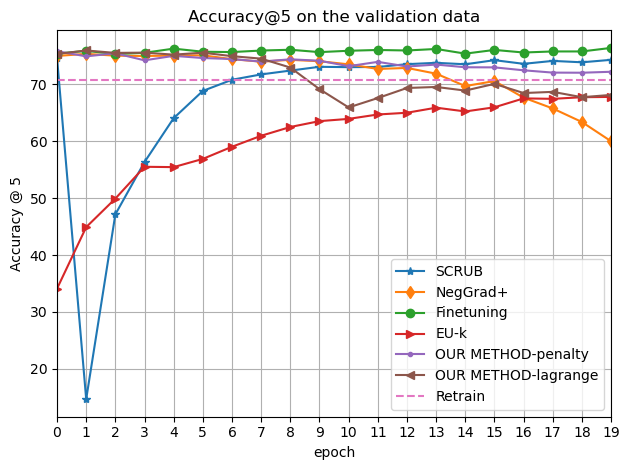

In [36]:
for value, method, marker in zip(all_values[:-1], methods[:-1], markers[:-1]):
    plt.plot(np.arange(20), value, label=method, marker=marker)

plt.plot(np.arange(20), 20 * [all_values[-1][-1]], linestyle='--', label=methods[-1])
plt.xlabel('epoch')
plt.ylabel('Accuracy @ 5')
plt.grid()
# plt.ylim(bottom=20, top=100)
plt.xlim(left=0, right=19)
plt.xticks(np.arange(0, 20, 1))
plt.title('Accuracy@5 on the validation data')
plt.legend()
plt.tight_layout()
plt.savefig('/home/gasanoe/HOME_SCRATCH_FOLDER/unlearning/plots/acc_5_validation.pdf')